Roberto Pichardo Mier    2022670254

Objetivo

El objetivo de esta práctica es que los estudiantes adquieran habilidades en el análisis estadístico y el modelado de series de tiempo utilizando el lenguaje de programación R.

Instrucciones

1. Dataset

Se utilizará el dataset "AirPassengers", que contiene el número de pasajeros de una aerolínea internacional por mes desde enero de 1949 hasta diciembre de 1960. Lo pueden utilizar usando la función: data("AirPassengers")



In [1]:
library(WDI)
library(forecast)
library(ggplot2)
library(TSA)
library(dplyr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
data("AirPassengers")

In [6]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


2. Análisis Estadístico

Realizar un análisis estadístico descriptivo para comprender la estructura de los datos. Se deberá calcular la media, la mediana, desviación estándar y la gráfica de distribución de datos. Se deberá investigar cómo hacer una gráfica de pastel en R para graficar la media de pasajeros por año, obteniendo la siguiente gráfica:


In [7]:
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

In [8]:
tail(AirPassengers)

,Jul,Aug,Sep,Oct,Nov,Dec
1960,622,606,508,461,390,432


In [9]:
head(AirPassengers)

,Jan,Feb,Mar,Apr,May,Jun
1949,112,118,132,129,121,135


In [14]:
media <- mean(AirPassengers)

In [19]:
desviacion_estandar <- sd(AirPassengers)

In [16]:
mediana <- median(AirPassengers)

In [20]:
print(paste("media: " , media))
print(paste("Mediana", mediana))
print(paste("Desviacion Estandar", desviacion_estandar))

[1] "media:  280.298611111111"
[1] "Mediana 265.5"
[1] "Desviacion Estandar 119.966316942943"


In [21]:
R.version.string

[1] "R version 4.3.1 (2023-06-16)"

In [26]:
datos <- data.frame(Passengers = as.numeric(AirPassengers))

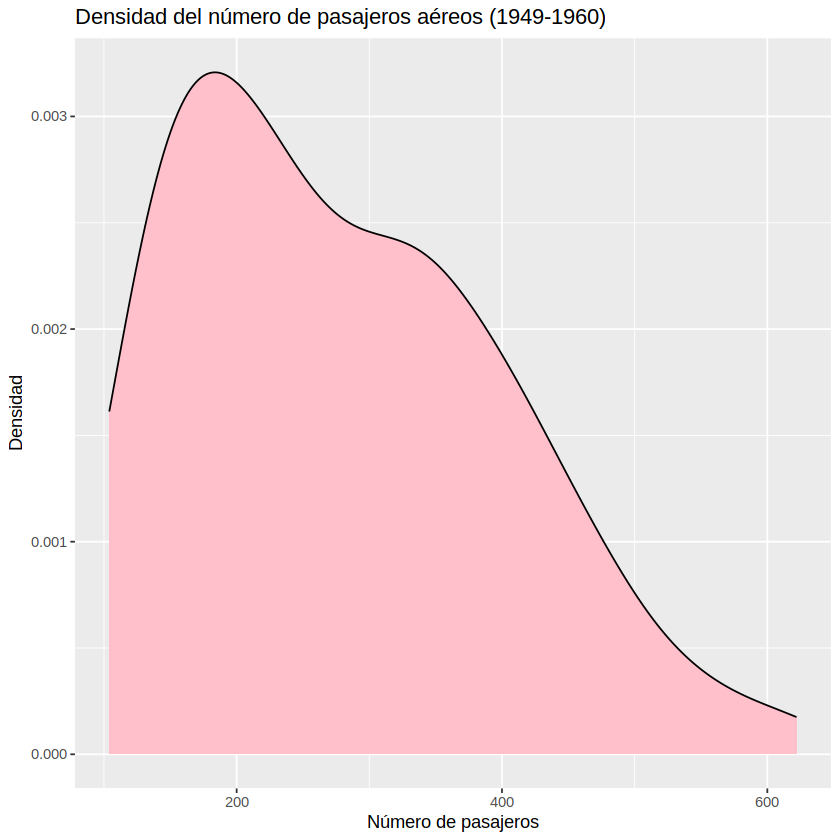

In [28]:
ggplot(datos, aes(x = Passengers)) +
  geom_density(fill="pink", color="black") +
  labs(title="Densidad del número de pasajeros aéreos (1949-1960)",
       x= "Número de pasajeros",
       y = "Densidad")

In [29]:
datos <- data.frame(
  Year = floor(time(AirPassengers)),
  Passengers = as.numeric(AirPassengers)
)

In [30]:
datos_media_año <- datos %>%
  group_by(Year) %>%
  summarise(MeanPassengers = mean(Passengers))

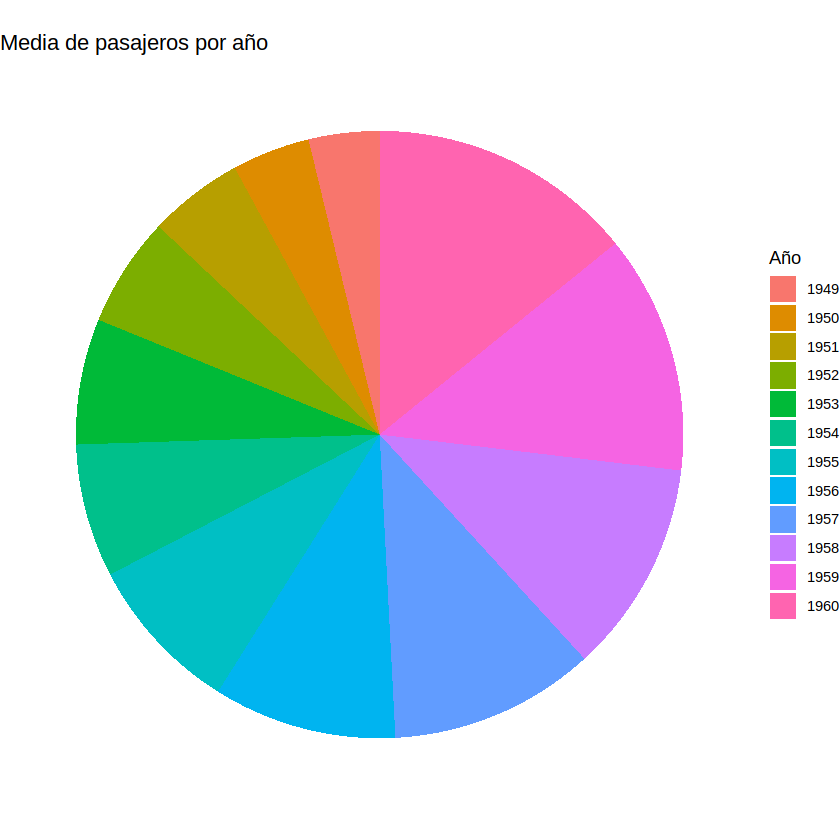

In [31]:
ggplot(datos_media_año, aes(x = "", y = MeanPassengers, fill = factor(Year))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  labs(title = "Media de pasajeros por año",
       x = "",
       y = "",
       fill = "Año") +
  theme_void()

3. Serie de Tiempo

Visualizar en una gráfica los datos en una serie de tiempo 

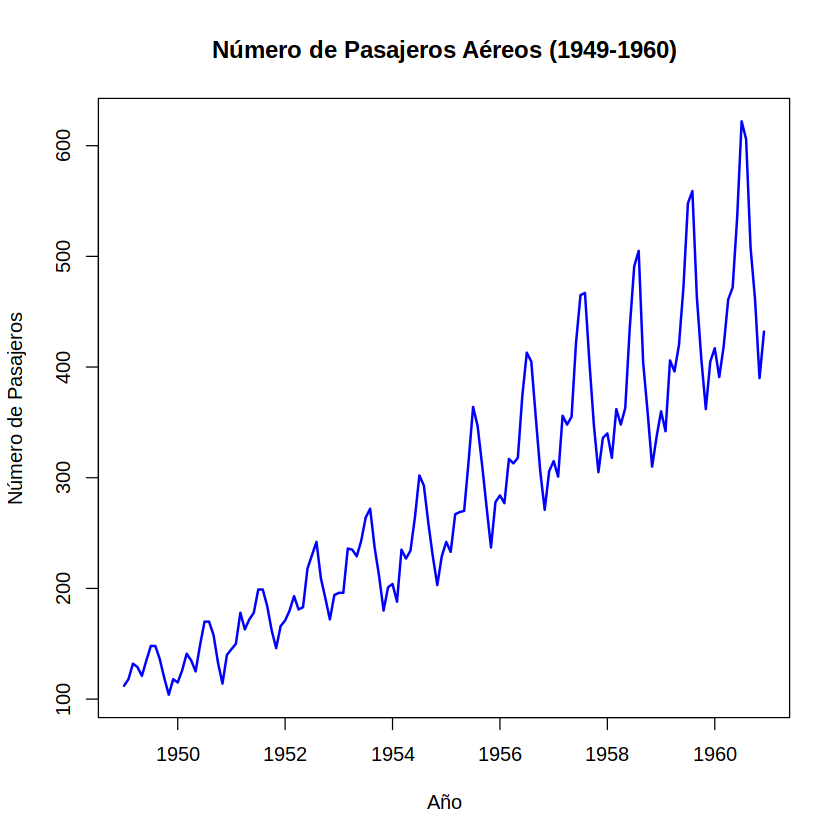

In [35]:
data(AirPassengers)
# Visualizar la serie de tiempo utilizando la función plot
plot(AirPassengers, 
     main="Número de Pasajeros Aéreos (1949-1960)", 
     ylab="Número de Pasajeros", 
     xlab="Año", 
     col="blue", 
     lwd=2)


4. Descomposición de la Serie de Tiempo

Investigar qué es la descomposición de una serie de tiempo e implementarlo para que obtengan lo siguiente:

In [36]:
decomposed_data <- decompose(AirPassengers)

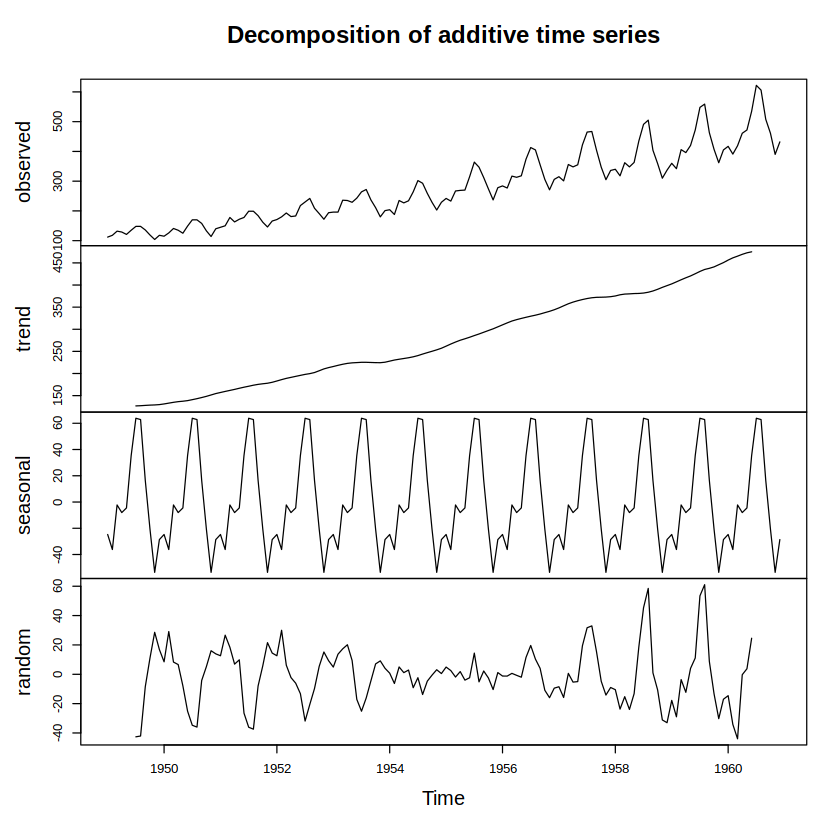

In [38]:
plot(decomposed_data)

5. Modelado y Pronóstico

Entrenar un modelo ARIMA para hacer un pronóstico de pasajeros en años futuros a los contenidos en el dataset. Se deberá realizar un summary del modelo, y se deberá obtener el accuracy.

In [39]:
train <- window(AirPassengers, start=c(1949,1), end=c(1958,12))
test <- window(AirPassengers, start=c(1959,1))

In [40]:
model <- auto.arima(train)

Series: train 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.2397
s.e.   0.0935

sigma^2 = 103.6:  log likelihood = -399.64
AIC=803.28   AICc=803.4   BIC=808.63

Training set error measures:
                      ME     RMSE      MAE         MPE    MAPE      MASE
Training set -0.01614663 9.567988 7.120167 -0.03346412 2.90195 0.2491828
                   ACF1
Training set 0.00821452

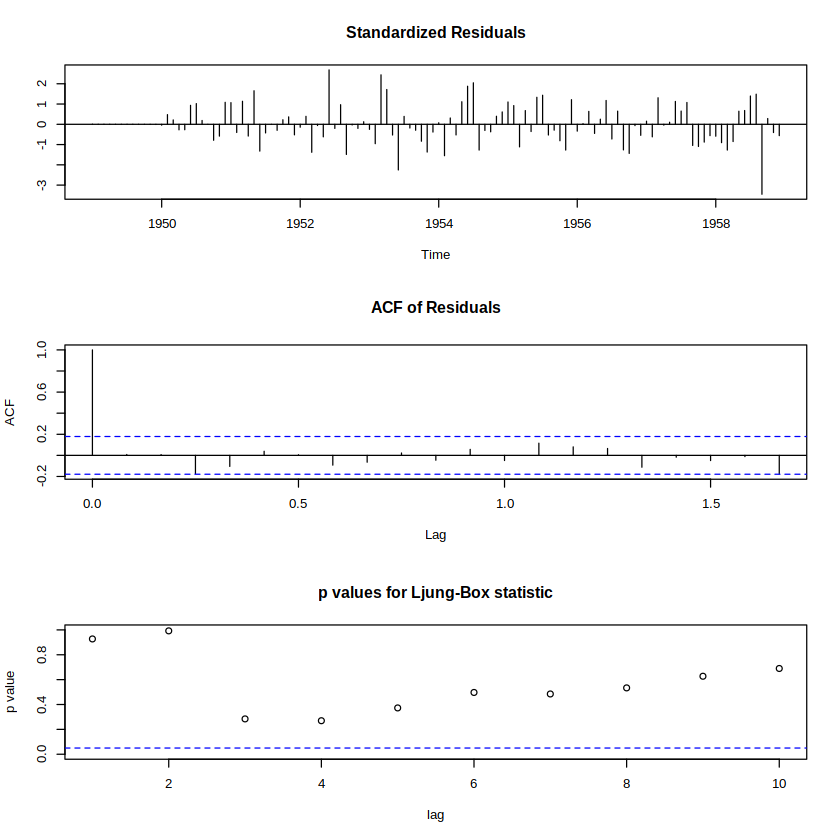


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,0)[12]
Q* = 32.841, df = 23, p-value = 0.08388

Model df: 1.   Total lags used: 24



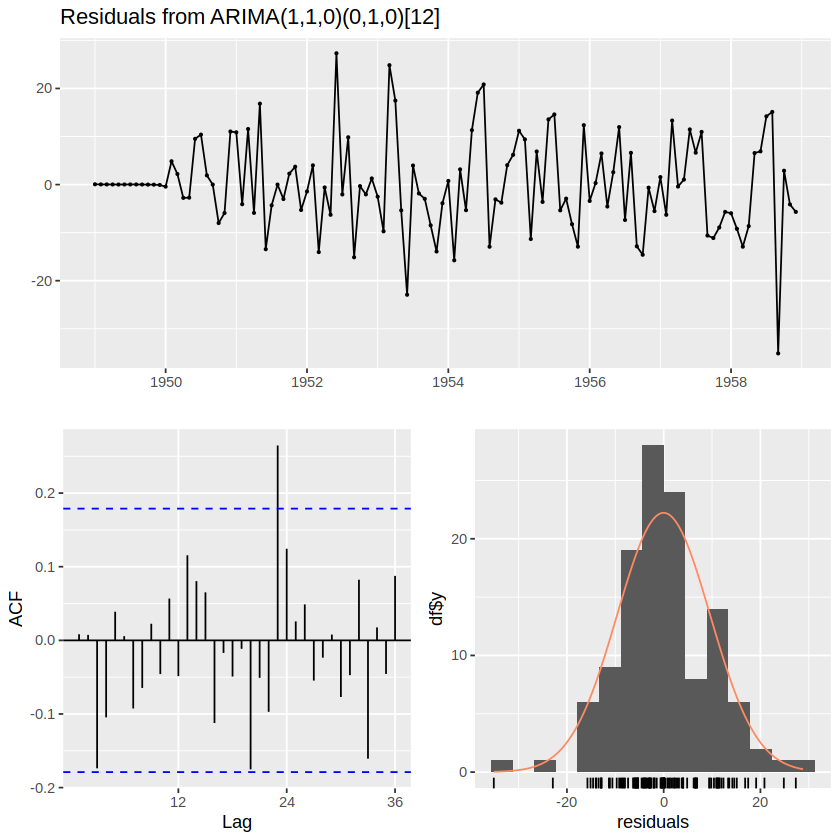

In [46]:
#Resumen del modelo
summary(model)

#Diagnostico
tsdiag(model)

# Revisar los residuos o errores del modelo
checkresiduals(model)

In [42]:
forecasted <- forecast(model, h=24)

In [45]:
forecasted

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1959       341.9589 328.9124 355.0054 322.0060 361.9118
Feb 1959       319.7290 303.3402 336.1179 294.6644 344.7937
Mar 1959       363.7842 344.2287 383.3396 333.8767 393.6916
Apr 1959       349.7709 327.5801 371.9617 315.8330 383.7088
May 1959       364.7741 340.2108 389.3374 327.2078 402.3404
Jun 1959       436.7733 410.0515 463.4952 395.9057 477.6410
Jul 1959       492.7735 464.0539 521.4932 448.8506 536.6964
Aug 1959       506.7735 476.1865 537.3604 459.9948 553.5522
Sep 1959       405.7735 373.4268 438.1202 356.3035 455.2435
Oct 1959       360.7735 326.7580 394.7890 308.7512 412.7958
Nov 1959       311.7735 276.1673 347.3797 257.3185 366.2285
Dec 1959       338.7735 301.6446 375.9023 281.9898 395.5572
Jan 1960       343.7324 299.7540 387.7109 276.4732 410.9917
Feb 1960       321.5025 273.0051 370.0000 247.3321 395.6729
Mar 1960       365.5577 312.6321 418.4832 284.6150 446.5003
Apr 1960       351.5444 294.6002 408.488

In [43]:
accuracy(forecasted, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01614663,9.567988,7.120167,-0.03346412,2.90195,0.2491828,0.00821452,NA
Test set,68.57729062,74.252246,68.577291,14.92755831,14.92756,2.3999830,0.71840294,1.464657


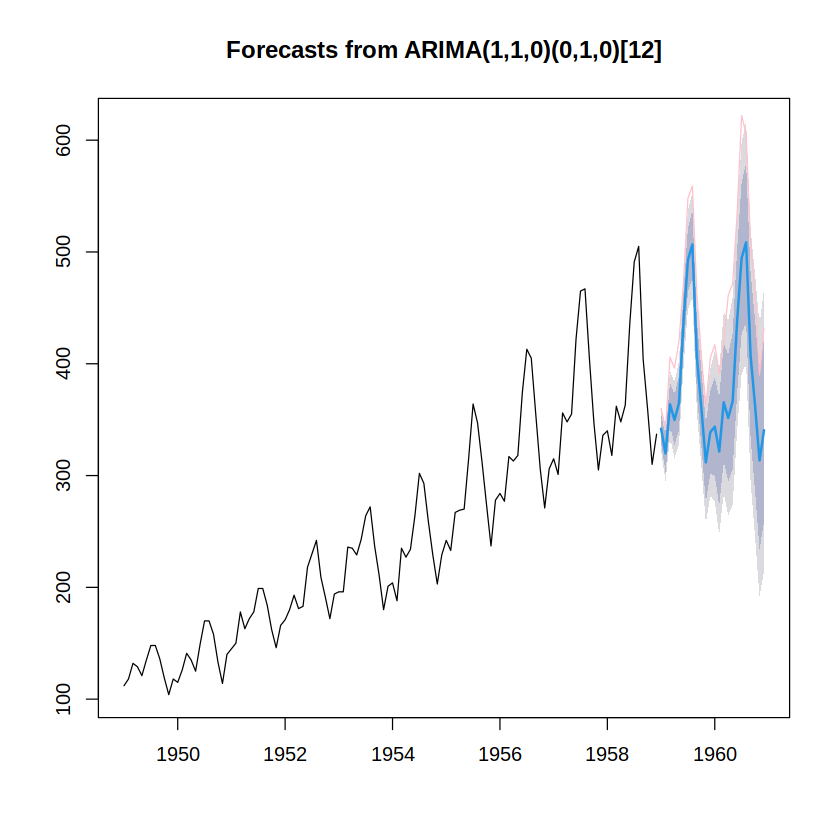

In [44]:
plot(forecasted)
lines(test, col="pink")